In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

directory = 'drive/MyDrive/ISYE7750/hw2/'

 np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

Mounted at /content/drive


# (a)

In [2]:
data = pd.read_csv(directory+"diabetes.csv",header=0)
data

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,prog
0,59,1,32.1,101.0,157,93.2,38.0,4.00,2.11,87,151
1,48,0,21.6,87.0,183,103.2,70.0,3.00,1.69,69,75
2,72,1,30.5,93.0,156,93.6,41.0,4.00,2.03,85,141
3,24,0,25.3,84.0,198,131.4,40.0,5.00,2.12,89,206
4,50,0,23.0,101.0,192,125.4,52.0,4.00,1.86,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,1,28.2,112.0,185,113.8,42.0,4.00,2.16,93,178
438,47,1,24.9,75.0,225,166.0,42.0,5.00,1.93,102,104
439,60,1,24.9,99.7,162,106.6,43.0,3.77,1.79,95,132
440,36,0,30.0,95.0,201,125.2,42.0,4.79,2.23,85,220


In [3]:
# Standardize the predictors 
col_names = data.columns
for col in col_names[:-1]:
  data[col] = stats.zscore(data[col])
data

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,prog
0,0.800500,1.065488,1.297088,0.459846,-0.929746,-0.732065,-0.912451,-0.054499,0.415599,-0.370989,151
1,-0.039567,-0.938537,-1.082180,-0.553446,-0.177624,-0.402886,1.564414,-0.830301,-1.436339,-1.938479,75
2,1.793307,1.065488,0.934533,-0.119178,-0.958674,-0.718897,-0.680245,-0.054499,0.062849,-0.545154,141
3,-1.872441,-0.938537,-0.243771,-0.770581,0.256292,0.525397,-0.757647,0.721302,0.459692,-0.196823,206
4,0.113172,-0.938537,-0.764944,0.459846,0.082726,0.327890,0.171178,-0.054499,-0.686745,-0.980568,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256005,-0.119769,-0.053957,-0.602843,-0.054499,0.636067,0.151508,178
438,-0.115937,1.065488,-0.334410,-1.421983,1.037341,1.664355,-0.602843,0.721302,-0.378089,0.935254,104
439,0.876870,1.065488,-0.334410,0.365755,-0.785107,-0.290965,-0.525441,-0.232934,-0.995401,0.325674,132
440,-0.956004,-0.938537,0.821235,0.025578,0.343075,0.321306,-0.602843,0.558384,0.944723,-0.545154,220


# (b)

## Method 1 : Sklearn

In [20]:
from sklearn.linear_model import LinearRegression

xdata = data.iloc[:,:-1].to_numpy()
ydata = data['prog'].to_numpy().reshape(-1,1)
n, d = xdata.shape

linear_regressor = LinearRegression()
linear_regressor.fit(xdata, ydata)
y_pred = linear_regressor.predict(xdata)

print("weight: ", linear_regressor.coef_)
print("intercept: ", linear_regressor.intercept_)

print("cost: ", ((ydata - y_pred)**2).sum()/n)

weight:  [[-0.4621 -11.3733 24.6936 15.4175 -37.4332 22.4540 4.7522 8.4306 35.6459
  3.2323]]
intercept:  [152.1335]
cost:  2860.326900889017


## Method 2: From Scratch

In [21]:
class LinReg():
  def __init__(self, learn_rate, iter, no_intercept=False) :
    self.learn_rate = learn_rate
    self.iter = iter
    self.no_intercept = no_intercept

  def fit(self, X, y):
    # no_of_training_examples, no_of_features
    n, d = X.shape
    self.n = n
    # Initialize data
    self.w = np.zeros((d,1))
    self.b = 0
    self.J = np.ones((n,1))
    self.X = X
    self.y = y.reshape((n,1))
      
    # Gradient Descent
    if not self.no_intercept:
      for _ in range(self.iter):
        self.update()
    else:
      for _ in range(self.iter):
        self.update_ni()

  def update_ni(self):
    yhat = self.predict_ni(self.X)
    # Compute gradients 
    dw = -2/self.n * self.X.T @ (self.y - yhat) 
    # update weights
    self.w = self.w - self.learn_rate * dw

  def update(self):
    yhat = self.predict(self.X)
    # Compute gradients 
    dw = -2/self.n * self.X.T @ (self.y - yhat) 
    db = -2/self.n * self.J.T @ (self.y - yhat)
    # update weights
    self.w = self.w - self.learn_rate * dw
    self.b = self.b - self.learn_rate * db
    
  def predict(self, X):
    return X @ self.w + self.b
  
  def predict_ni(self, X):
    return X @ self.w
  
  def cost(self):
    if not self.no_intercept:
      pred = self.predict
    else:
      pred = self.predict_ni

    JJ = 0
    for i in range(self.n):
      JJ += (self.y[i] - pred(self.X[i]))**2
    return JJ / self.n  

In [22]:
# Linear regression with intercept
mdl = LinReg(iter=2000, learn_rate=0.01)
mdl.fit(xdata, ydata) 
# Get coefficients and intecept
print("weights: ", mdl.w)
print("intercept: ", mdl.b)

# Get the cost
print("cost: ", mdl.cost())

weights:  [[-0.3467]
 [-11.2503]
 [25.0069]
 [15.3073]
 [-11.8601]
 [2.1184]
 [-6.6397]
 [5.2573]
 [26.0870]
 [3.3208]]
intercept:  [[152.1335]]
cost:  [[2871.4639]]


## Method 3

In [23]:
xdata = np.hstack((xdata, np.ones((n,1))))
M = xdata.T @ xdata
res = np.linalg.inv(M) @ xdata.T @ ydata
print(res)

cost = 0
for i in range(n):
  cost += (ydata[i] - xdata[i,:] @ res)**2
cost /= n
print("cost: ", cost)

[[-0.4621]
 [-11.3733]
 [24.6936]
 [15.4175]
 [-37.4332]
 [22.4540]
 [4.7522]
 [8.4306]
 [35.6459]
 [3.2323]
 [152.1335]]
cost:  [2860.3269]


# (c)

## Method 1: Sklearn

In [24]:
from sklearn.linear_model import LinearRegression

xdata = data.iloc[:,:-1].to_numpy()
ydata = data['prog'].to_numpy().reshape(-1,1)
n, d = xdata.shape

linear_regressor = LinearRegression(fit_intercept=False)
linear_regressor.fit(xdata, ydata)
y_pred = linear_regressor.predict(xdata)

print("weight: ", linear_regressor.coef_)
print("intercept: ", linear_regressor.intercept_)

print("cost: ", ((ydata - y_pred)**2).sum()/n)

weight:  [[-0.4621 -11.3733 24.6936 15.4175 -37.4332 22.4540 4.7522 8.4306 35.6459
  3.2323]]
intercept:  0.0
cost:  26004.923904431133


## Method 2: From Scratch

In [25]:
# Linear regression with intercept
mdl = LinReg(iter=2000, learn_rate=0.01, no_intercept=True)
mdl.fit(xdata, ydata)

# Get coefficients and intecept
print("weights: ", mdl.w)
print("intercept: ", mdl.b)

# Get the cost
print("cost: ", mdl.cost())

weights:  [[-0.3467]
 [-11.2503]
 [25.0069]
 [15.3073]
 [-11.8601]
 [2.1184]
 [-6.6397]
 [5.2573]
 [26.0870]
 [3.3208]]
intercept:  0
cost:  [26016.0609]


In [26]:
M = xdata.T @ xdata
res = np.linalg.inv(M) @ xdata.T @ ydata
print(res)

cost = 0
for i in range(n):
  cost += (ydata[i] - xdata[i,:] @ res)**2
cost /= n
print("cost: ", cost)

[[-0.4621]
 [-11.3733]
 [24.6936]
 [15.4175]
 [-37.4332]
 [22.4540]
 [4.7522]
 [8.4306]
 [35.6459]
 [3.2323]]
cost:  [26004.9239]


# (d)

43.86972935723394


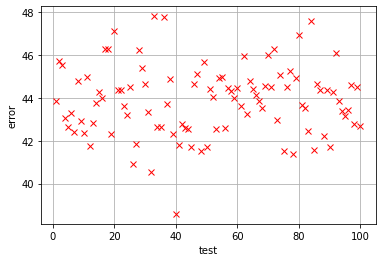

In [57]:
xdata = data.iloc[:,:-1].to_numpy()
ydata = data['prog'].to_numpy().reshape(-1,1)
n, d = xdata.shape

# error test
test_err = []
for i in range(100):
  idx = np.random.choice(n, int(n/2), replace=False)
  xtrain = xdata[idx,:]
  ytrain = ydata[idx]
  xtest = xdata[~idx,:]
  ytest = ydata[~idx]
  
  xtrain = np.hstack((xtrain, np.ones((int(n/2),1))))
  xtest = np.hstack((xtest, np.ones((int(n/2),1))))

  M = xtrain.T @ xtrain
  weights = np.linalg.inv(M) @ xtrain.T @ ytrain

  err = (np.absolute(ytest - xtest @ weights)).sum() / (n/2)
  test_err.append(err)

plt.figure()
plt.plot(np.arange(1,101), test_err, 'xr')
plt.xlabel("test")
plt.ylabel("error")
plt.grid(which="major")
plt.savefig(directory + "d_err.png")
print(sum(test_err)/100)

# (e)

152.53232026082665


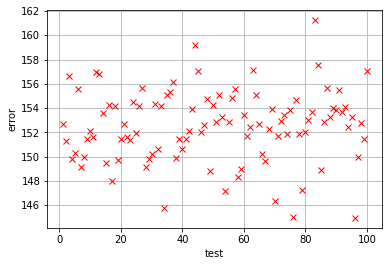

In [56]:
xdata = data.iloc[:,:-1].to_numpy()
ydata = data['prog'].to_numpy().reshape(-1,1)
n, d = xdata.shape

# error test
test_err = []
for i in range(100):
  idx = np.random.choice(n, int(n/2), replace=False)
  xtrain = xdata[idx,:]
  ytrain = ydata[idx]
  xtest = xdata[~idx,:]
  ytest = ydata[~idx]

  M = xtrain.T @ xtrain
  weights = np.linalg.inv(M) @ xtrain.T @ ytrain

  err = (np.absolute(ytest - xtest @ weights)).sum() / (n/2)
  test_err.append(err)

plt.figure()
plt.plot(np.arange(1,101), test_err, 'xr')
plt.xlabel("test")
plt.ylabel("error")
plt.grid(which="major")
plt.savefig(directory + "e_err.png")
print(sum(test_err)/100)

